MACHINE LEARNING
Seminar 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

1. Loading the dataset from the .txt file and storing the data in a structured manner.

In [12]:
df = pd.read_csv('dataset_Seminar1.txt', sep=' ', header=None)
df.columns

column_names = [
    "Number of STAs", "Load", "Size(x)", "Size(y)", "Area", "Contention window", 
    "Channel width", "Packet size", "Max RSSI", "Avg. RSSI", "Min RSSI", 
    "Avg. Probability of failure", "Throughput", "Average delay", "Total airtime", "Proportional airtime"
]

df.columns = column_names

display(df.head(15))

,Number of STAs,Load,Size(x),Size(y),Area,Contention window,Channel width,Packet size,Max RSSI,Avg. RSSI,Min RSSI,Avg. Probability of failure,Throughput,Average delay,Total airtime,Proportional airtime
0,40.0,60000000.0,22.0,39.0,858.0,63.0,80.0,4000.0,-42.928330,-63.163012,-74.965338,0.415189,7.208644e+06,1.229466e+07,1.084041,0.875490
1,35.0,52500000.0,20.0,33.0,660.0,31.0,40.0,10000.0,-47.815800,-63.298410,-72.847989,0.485311,1.545116e+07,1.275042e+07,1.111263,0.873785
2,16.0,12000000.0,34.0,14.0,476.0,255.0,40.0,4000.0,-46.138494,-60.076333,-70.044800,0.099413,6.743660e+06,2.251690e+06,0.880036,0.849701
3,37.0,18500000.0,35.0,7.0,245.0,31.0,80.0,10000.0,-42.708813,-60.141393,-72.029643,0.493704,1.675025e+07,1.211374e+07,1.126341,0.860103
4,18.0,4500000.0,36.0,35.0,1260.0,127.0,160.0,8000.0,-45.492991,-63.780783,-76.225550,0.011664,4.500000e+06,1.446000e-03,0.276770,0.275687
5,3.0,750000.0,27.0,11.0,297.0,511.0,160.0,6000.0,-52.119498,-52.293538,-52.380558,0.000938,7.500000e+05,2.915000e-03,0.059394,0.059375
6,21.0,31500000.0,37.0,37.0,1369.0,63.0,80.0,12000.0,-46.518685,-65.360763,-73.774614,0.309117,2.020151e+07,3.889584e+06,1.026311,0.903537
7,39.0,19500000.0,26.0,26.0,676.0,1023.0,80.0,12000.0,-44.833998,-60.630718,-70.999706,0.071531,1.887521e+07,1.536909e+07,0.824329,0.804576
8,13.0,19500000.0,2.0,27.0,54.0,3.0,80.0,10000.0,-42.537724,-54.701587,-66.405520,0.596899,1.635737e+07,1.530696e+06,1.210037,0.815226
9,34.0,8500000.0,12.0,7.0,84.0,511.0,160.0,4000.0,-43.497708,-50.635535,-55.915320,0.109673,7.143939e+06,9.060295e+06,0.884203,0.848343


2. Displaying statistics about each feature (mean, standard deviation).

In [13]:
for column in df.columns:
    print(column)
    print("Mean", df[column].mean(axis=0))
    print("Standard deviation", df[column].std(axis=0))
    print()

Number of STAs
Mean 21.44617
Standard deviation 11.554365294756508

Load
Mean 21402920.0
Standard deviation 18520420.534733217

Size(x)
Mean 20.56294
Standard deviation 11.545206428397664

Size(y)
Mean 20.47964
Standard deviation 11.54062551730942

Area
Mean 421.27035
Standard deviation 360.3443488683777

Contention window
Mean 227.04392
Standard deviation 323.35085456634414

Channel width
Mean 75.106
Standard deviation 53.70427921028319

Packet size
Mean 7997.58
Standard deviation 2825.5325126318753

Max RSSI
Mean -45.911165401990004
Standard deviation 5.400265304779439

Avg. RSSI
Mean -57.57742637042
Standard deviation 6.108547533579598

Min RSSI
Mean -66.46782748315
Standard deviation 8.057527794685017

Avg. Probability of failure
Mean 0.22667609688
Standard deviation 0.22484756924908272

Throughput
Mean 9716009.36023311
Standard deviation 4958024.818158029

Average delay
Mean 4688176.278499954
Standard deviation 7875887.345974412

Total airtime
Mean 0.7805603242800001
Standard devi

3. Plotting relevant figures to visualize how data is distributed.

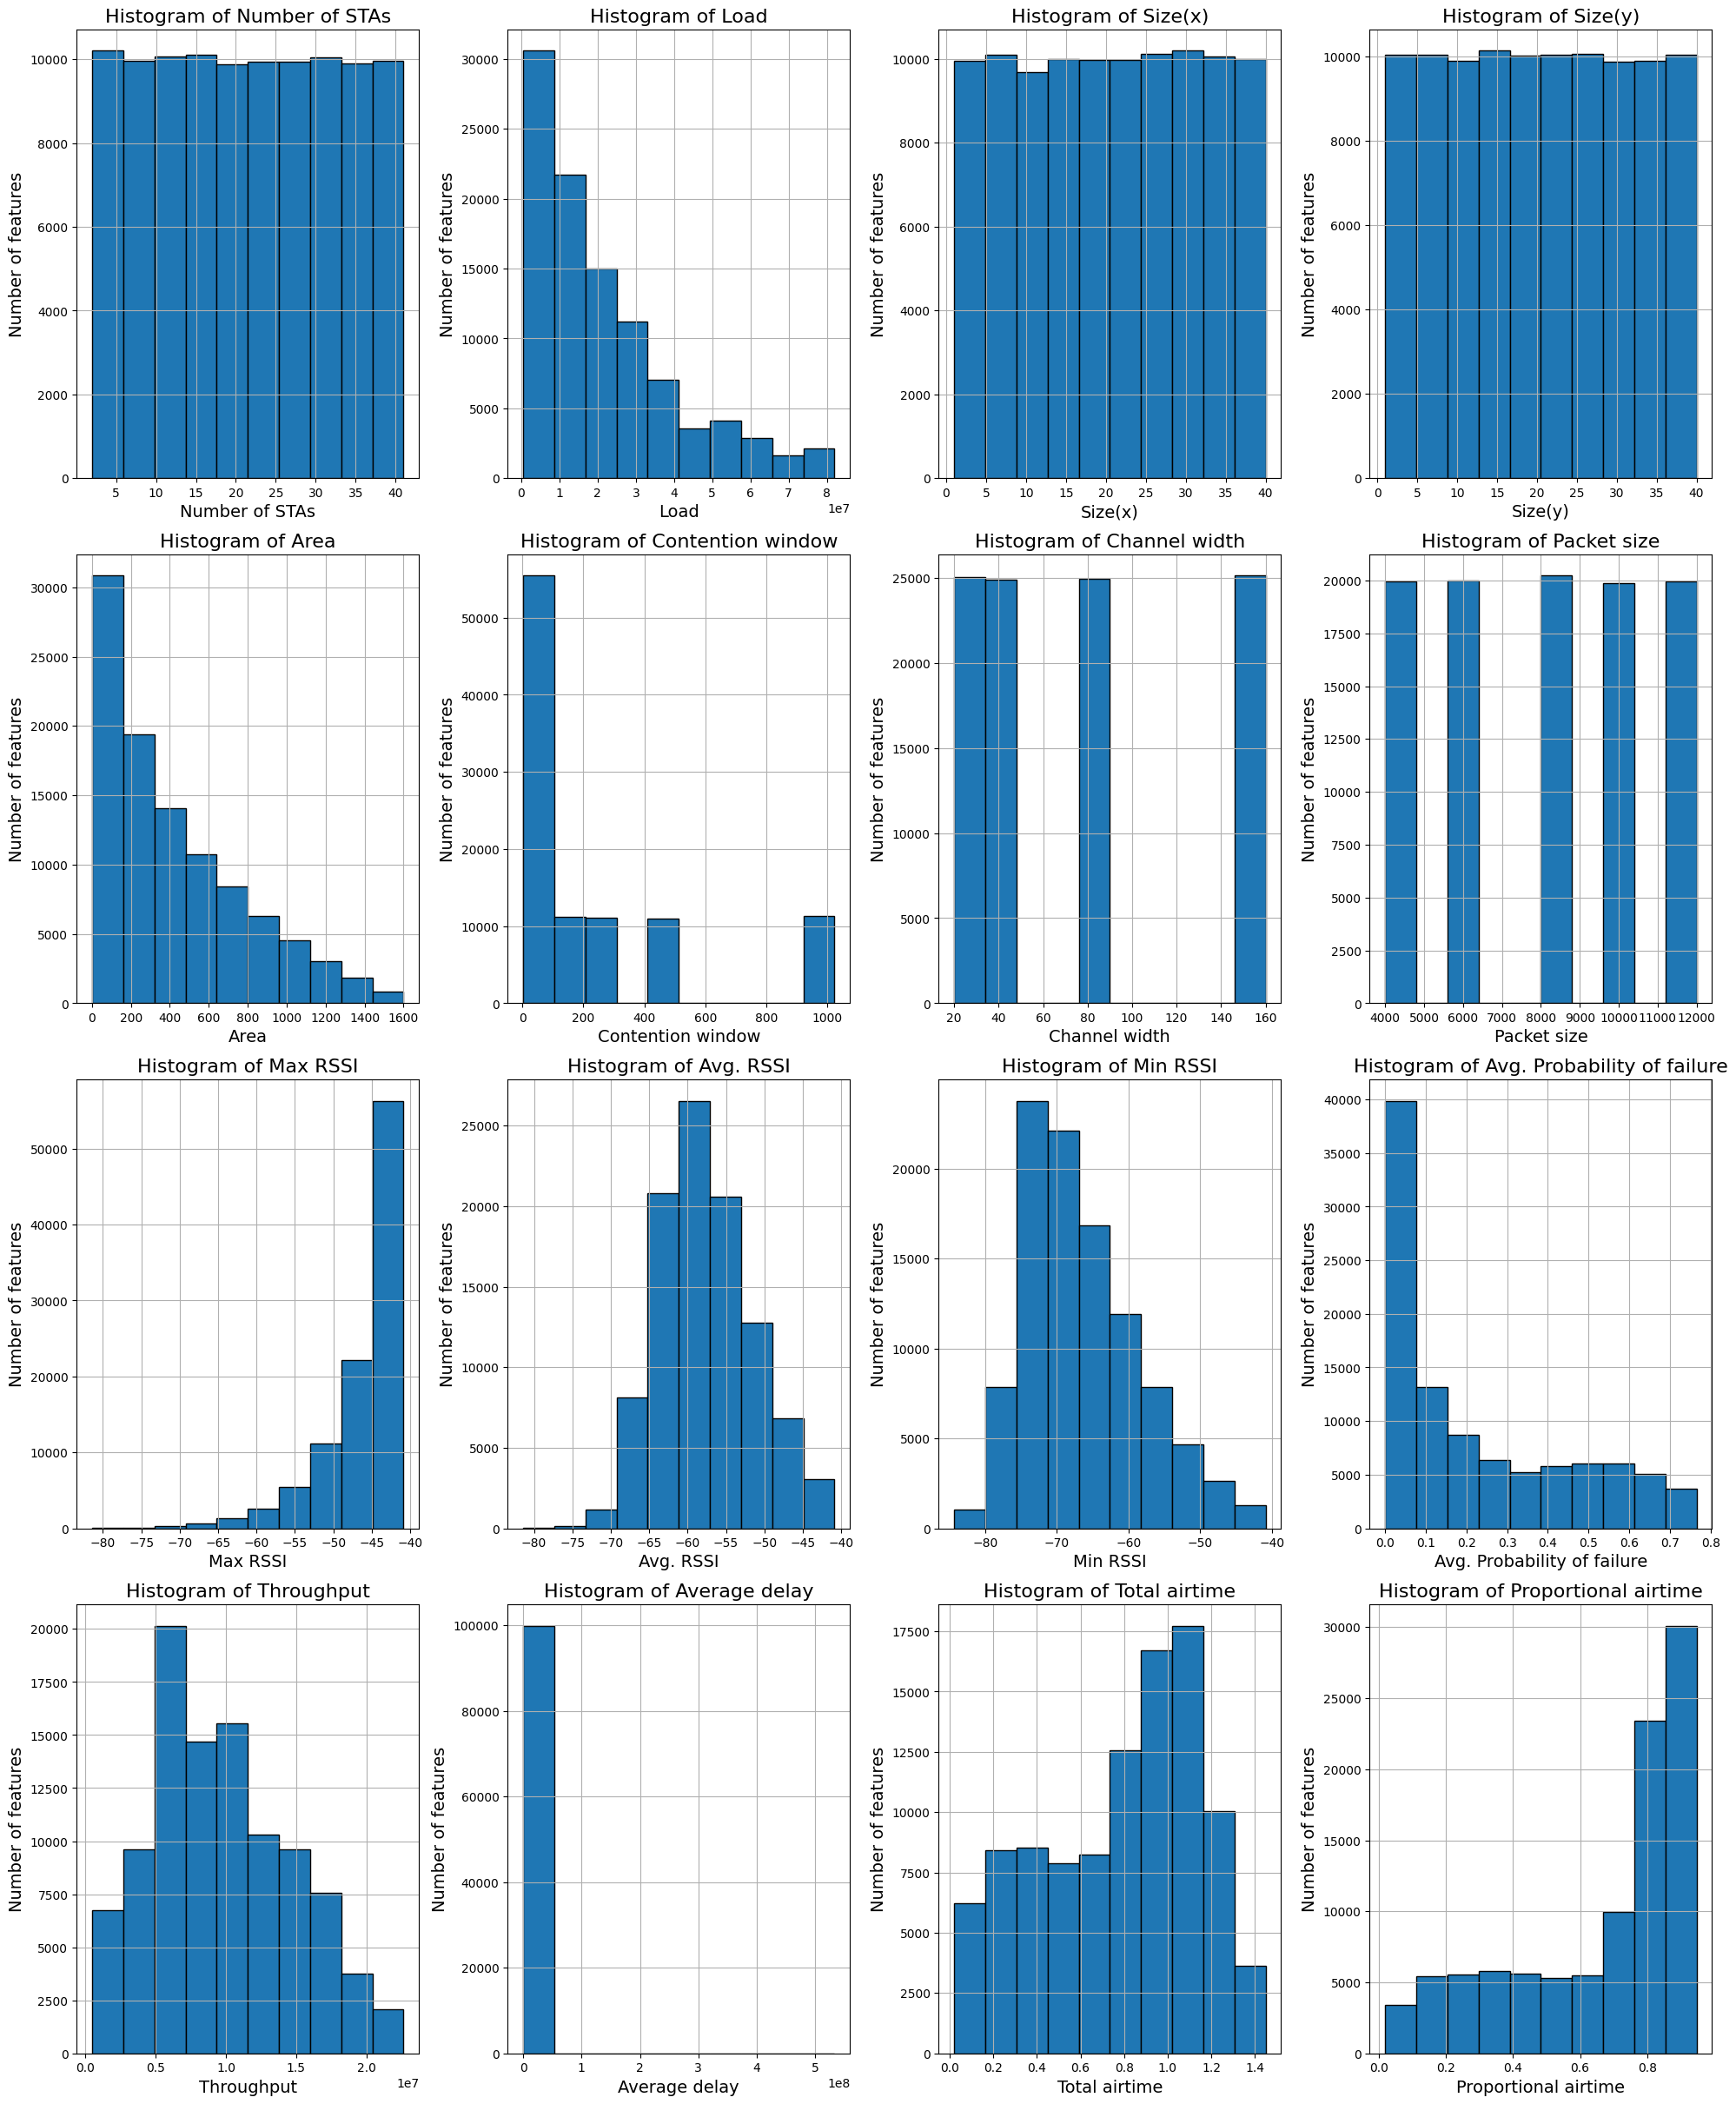

In [14]:
num_columns = len(df.columns)

nrows = (num_columns // 2) + (num_columns % 2) 
ncols = 4 

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 6 * nrows))

axes = axes.flatten()

for ax, column in zip(axes, df.columns):
    ax.hist(df[column], bins=10, edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Texto más grande
    ax.set_ylabel("Number of features", fontsize=14)
    ax.set_title(f"Histogram of {column}", fontsize=16)
    ax.grid(True)  # Añadir una cuadrícula ligera

for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

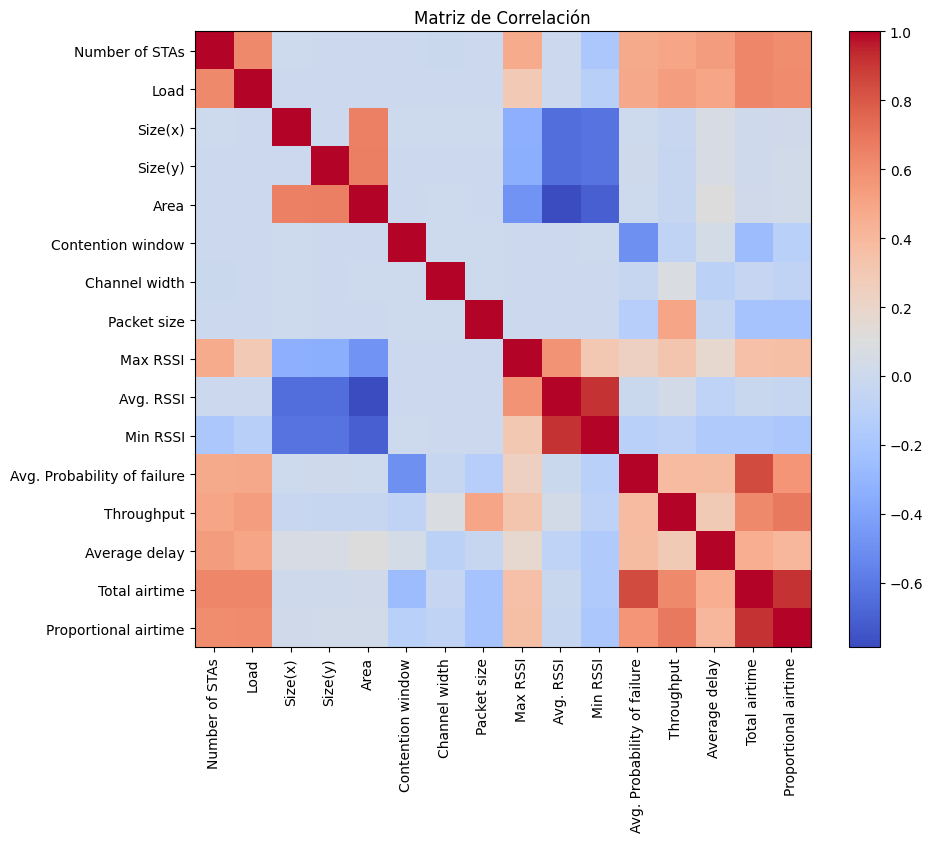

In [33]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear la figura y el eje
plt.figure(figsize=(10, 8))

# Mostrar la matriz de correlación con un mapa de calor (heatmap)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')

# Añadir la barra de colores
plt.colorbar()

# Añadir las etiquetas de los ejes
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Añadir título
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()

In [42]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Filtrar correlaciones mayores a 0.7 en valor absoluto, excluyendo las correlaciones triviales (con uno mismo)
filtered_corr = correlation_matrix[(correlation_matrix.abs() >= 0.35) & (correlation_matrix != 1.0)]

# Crear una matriz triangular superior para evitar duplicados
upper_triangle = np.triu(np.ones_like(filtered_corr, dtype=bool), k=1)

# Filtrar la matriz de correlación para mostrar solo los pares sin duplicados
filtered_corr = filtered_corr.where(upper_triangle)

# Mostrar la matriz filtrada
print(filtered_corr)

# Extraer los pares de correlación que son mayores a 0.5
pairs = []
for col in filtered_corr.columns:
    for row in filtered_corr.index:
        if not np.isnan(filtered_corr.loc[row, col]):
            if row == "Trhoughput" or col == "Throughput":
                pairs.append((row, col))

print("Pares de variables con correlación mayor a 0.5:")
print(pairs)

                             Number of STAs      Load  Size(x)  Size(y)  \
Number of STAs                          NaN  0.621569      NaN      NaN   
Load                                    NaN       NaN      NaN      NaN   
Size(x)                                 NaN       NaN      NaN      NaN   
Size(y)                                 NaN       NaN      NaN      NaN   
Area                                    NaN       NaN      NaN      NaN   
Contention window                       NaN       NaN      NaN      NaN   
Channel width                           NaN       NaN      NaN      NaN   
Packet size                             NaN       NaN      NaN      NaN   
Max RSSI                                NaN       NaN      NaN      NaN   
Avg. RSSI                               NaN       NaN      NaN      NaN   
Min RSSI                                NaN       NaN      NaN      NaN   
Avg. Probability of failure             NaN       NaN      NaN      NaN   
Throughput               

4. Processing the data (e.g., cleaning, normalization, categorical, etc.) and prepare it to
 be used by an ML model.

<Figure size 1200x1200 with 0 Axes>

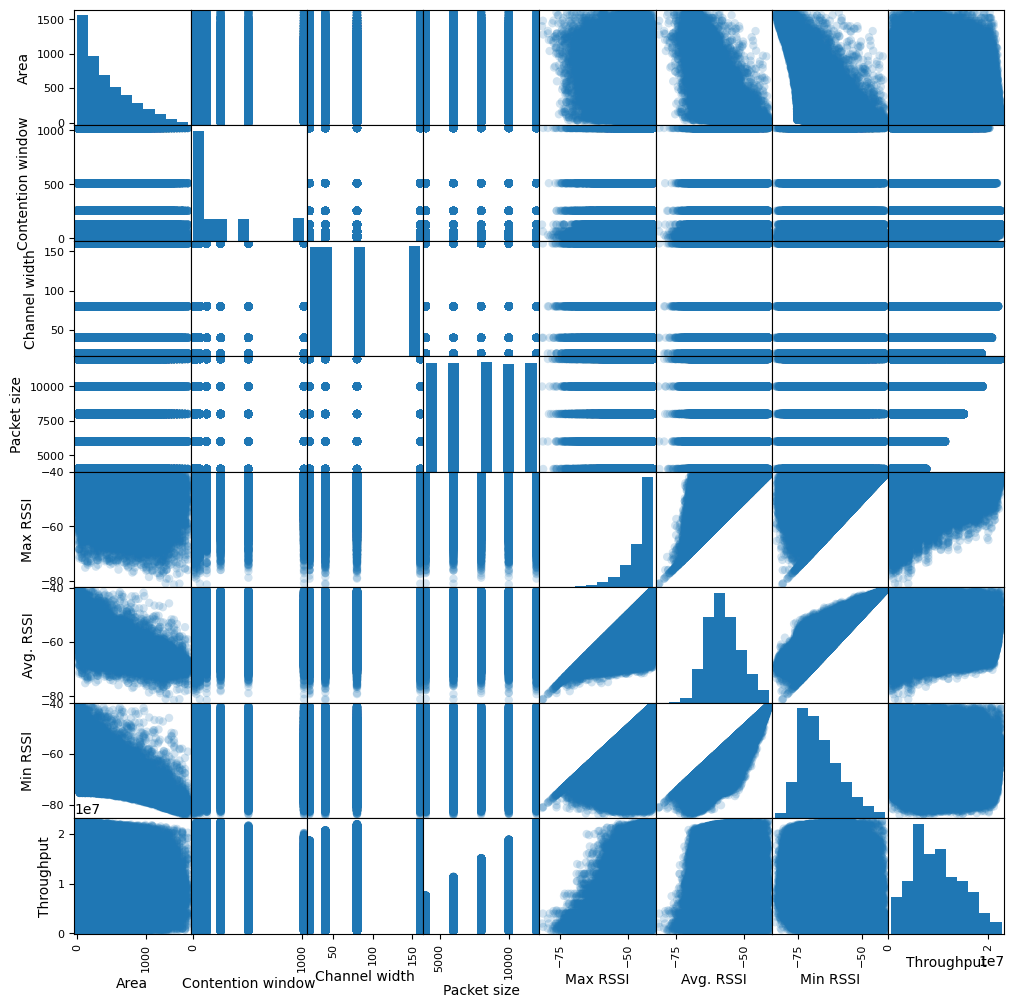

In [29]:
cleaned_df = df.copy()

# Eliminar columnas que no necesitas
# Comprobar si las columnas a eliminar existen en el DataFrame antes de intentar eliminarlas
columns_to_drop = ["Load", "Number of STAs", "Size(x)", "Size(y)", "Average delay", "Avg. Probability of failure", "Total airtime", "Proportional airtime"]

# Eliminar solo las columnas que están en el DataFrame
columns_in_df = [col for col in columns_to_drop if col in cleaned_df.columns]
cleaned_df = cleaned_df.drop(columns=columns_in_df)

sampled_df = cleaned_df.sample(frac=0.05, random_state=42)

# Generar la matriz de dispersión con un tamaño de figura más razonable
plt.figure(figsize=(12, 12))  # Ajusta el tamaño de la figura según lo que necesites
pd.plotting.scatter_matrix(cleaned_df, figsize=(12, 12), marker='o', alpha=0.2)  # Reducir opacidad de los puntos para hacer la visualización más clara

# Mostrar la gráfica
plt.show()

4. Processing the data (e.g., cleaning, normalization, categorical, etc.) and prepare it to
 be used by an ML model.